# Some examples of how to use DINEOFrun

In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Statistics
using Optim

┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\DINEOF.ji for DINEOF [top-level]
└ @ Base loading.jl:1240


In [2]:
?DINEOFrun

search: DINEOFrun DINEOF_errormap DINEOF_musquare



```
offset,XA,U,S,V,cvEOF,cvarray,errmap,musquare=DINEOFrun(X,whichgroups=[ ones(Int32,ndims(X)-1)...,2];
minimumcoverage=(0.1, 0.1),
cvmask="Automatic",
cvfraction=0.01,
cvmethod="Random",
maxbubblesize=0.01*[size(X)...],
dimensionsforcopy=[zeros(Int32,ndims(X)-1),1],
errormap=true,
musquare=0,
restart=[],
keepsvdcvrestart=true,
eofmax=size(X)[2]-1,
eofstart=1,
dineofmaxiter=10,
dineoftol=0.001,
svdmeth="svd",
svdtol=0.000001,
filter="None",
filterintensity=1.0,
filterrepetitions=1)
```

Provides a DINEOF reconstruction of an N-dimensional array `X`. Missing points are identified with NaN values. Since the input arrays can have more than 2 dimensions, you have to specify which dimensions need to be collapsed into one. To do so the array `whichgroups` specifies to which collapsed dimensions (1 or 2) each dimension is collapsed into. The output is the filtered field. If it is to be merged with the original data, you can use DINEOF_fuse.

# Input:

  * `X`: The N-dimensional array containing the data. Missing points are NaN
  * `whichgroups`: array of "1" or "2" of size ndims(X). for each dimension it tells if it goes into dimensions 1 or 2 for the SVD decomposition. Default is last dimension is group 2 only

# Optional keyword inputs with their defaults:

  * `minimumcoverage=(0.1, 0.1)` : The minimum coverage in each dimension for the collapsed matrix. If the coverage is below the threshold, the line or colums is taken out
  * `cvmask="Automatic"` : You can provide your own cross-validation mask. In that case cvmask is a boolean array of the same size as X with "true" on points for crossvalidation. If "Automatic", DINEOF will create the mask based on the next parameters
  * `cvfraction=0.01` : fraction of points to be used for cross validation (fraction is with respect to valid points)

  * `cvmethod="Random"` : method to create the cross validation mask. "Random" "Bubbles" or "CopyMask": If "Bubbles" are created the maximum size in each direction is specified in maxbubblesize. If "CopyMask" is used, dimensionsforcopy specifies along which dimensions tha NaN pattern of X can be copied to create a mask
  * `maxbubblesize=0.01*[size(X)...]` : maximum size of the bubbles in each direction

*	`dimensionsforcopy=[zeros(Int32,ndims(X)-1),1]`: array of 0 and 1. For each direction is indicates if one can move a mask of NaNs from X along that direction.

*	`errormap=true` : if false, error map returned is []

*	`musquare=0` : You can provide your own estimate of musquare to be used for OI error map calculations. If 0, DINEOF will do the estimate

*	`restart=[]` : You can provide an array of the same size of X to fill in the first guess in the missing points. If not provided, the matrix is filled randomly with a variance of the present data

  * `keepsvdcvrestart=true` : goes back to the best estimate of the reconstruction during final EOF decomposition

*	`eofmax=size(X)[2]-1`: maximum number of EOFs 

*	`eofstart=1` : number of EOFs to start with in the search of the optimum. Can be larger than 1, particularly if you had a good restart matrix

*	`dineofmaxiter=10` : Maximum Number of iterations  USV=X, X=fillfrom(USV) 

*	`dineoftol=0.001` : relative change during iterations below which one stops

*	`svdmeth="svd"` : work with SVD or with eigenvalues of X'X ("eig")

*	`svdtol=0.000001` : tolerance during svd decomposition of filled matrix (svds or eig)

*	`filter="None"` : filter to be applied to dimension 2. Note that this is the dimension in the innermost svd decomposition which might be dimension 1 of the outermost call since a transpose is performed if M<N

*	`filterintensity=1.0` : filter intensity

*	`filterrepetitions=1` : filter repetitions

# Output:

  * `offset` : the value that was subtracted from the original data to center them
  * `XA` : the analysed (filtered) data filled in in places where enough data where available (see coverage parameter)
  * `U` : array of U arrays. To get access to mode 2: U[2][1]
  * `S`: array of singular values. use diagm(S) if you want to work with matrices
  * `V` : array of V arrays: To get mode 3: V[3][1]
  * `cvEOF` : cross validation estimator (variance of misfit at cross validation points)
  * `errmap` : array of the same structure as X containing the error variance estimate of the reconstruction XA
  * `musquare` : the value of mu^2 used for the OI interpretation leading to error maps


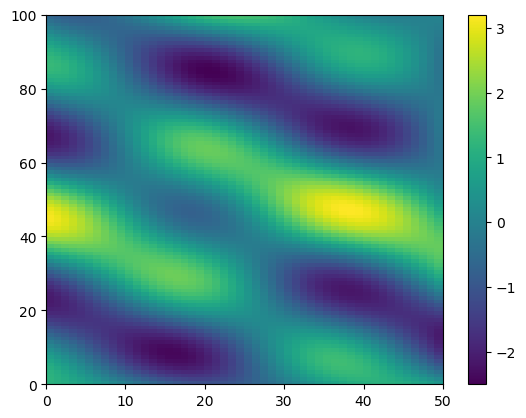

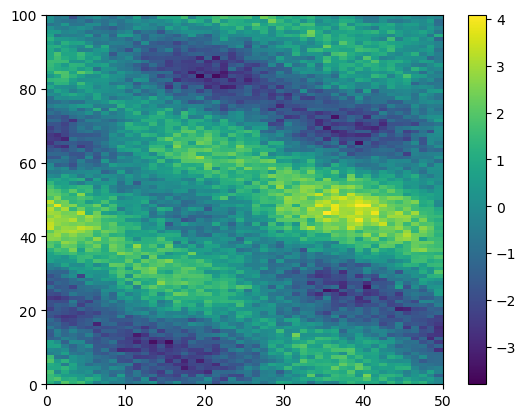

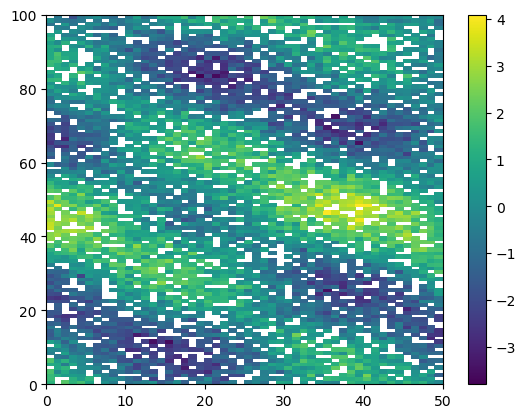

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000342D3940>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000034461D68>)

In [3]:
NX=100
NT=50
X=zeros(Float64,NX,NT)
for i=1:NX
    for j=1:NT
        X[i,j]=sin(i/6)*cos(j/6)+cos((i+j)/7)-sin((i/10))+exp(-.0001*(i-40)*(i-40))
    end
end
X=X.-mean(X)
pcolor(X),colorbar()
figure()
X=X+0.5*randn(NX,NT)
pcolor(X),colorbar()
figure()
ntot=prod(size(X))
for i=1:1300
    X[mod(rand(Int),ntot)+1]=NaN
end
pcolor(X),colorbar()

Raw data variance and mean: 1.8683912447585305 and -0.009199525759375474
Number of missing points (including possible masks): 1131 out of 5000
Number of data points before elimination of low coverage regions is 3869 and cv fraction 0.01008012406306539
Number of data points after elimination of low coverage regions is 3869 and cv fraction 0.01008012406306539
svds!: variance and mean of the entry matrix: 1.8598975522085408 , 0.003738131377353113 ; intial variance at points to fill in: 1.8308014719759116 
Convergence for 1 eofs, relative change 0.0007191279659097291 after 7 iterations
Eof loop 1 with mean squared misfit: 0.8133852364072808 
Convergence for 2 eofs, relative change 0.0009893827785346725 after 8 iterations
Eof loop 2 with mean squared misfit: 0.5700674865957571 
Convergence for 3 eofs, relative change 0.0005968369676045757 after 8 iterations
Eof loop 3 with mean squared misfit: 0.264233899568086 
Eof loop 4 with mean squared misfit: 0.2721322897581187 
Eof loop 5 with mean s

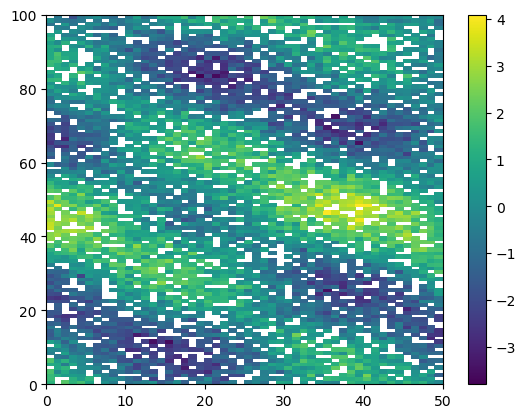

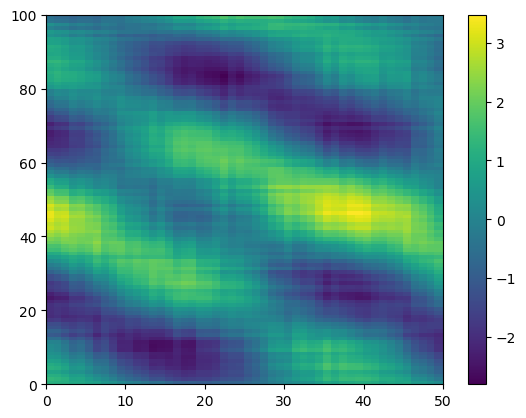


 18.705360 seconds (44.52 M allocations: 2.200 GiB, 7.51% gc time)


(PyObject <matplotlib.collections.PolyCollection object at 0x000000003786FC50>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000003B213BE0>)

In [4]:
@time xmean,XF,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF.+xmean),colorbar()

Be more severe on admissible coverage in one direction

Raw data variance and mean: 1.8683912447585305 and -0.009199525759375474
Number of missing points (including possible masks): 1131 out of 5000
Number of data points before elimination of low coverage regions is 3869 and cv fraction 0.01008012406306539
Number of data points after elimination of low coverage regions is 1531 and cv fraction 0.006531678641410843
svds!: variance and mean of the entry matrix: 1.9302635579635958 , 0.10678432640509403 ; intial variance at points to fill in: 1.8934803984948478 
Convergence for 1 eofs, relative change 0.0005302314693456234 after 8 iterations
Eof loop 1 with mean squared misfit: 1.1351675952364775 
Convergence for 2 eofs, relative change 0.0007884108395084979 after 9 iterations
Eof loop 2 with mean squared misfit: 0.7976675312804945 
Convergence for 3 eofs, relative change 0.0007277200576211812 after 9 iterations
Eof loop 3 with mean squared misfit: 0.4385982424094944 
Eof loop 4 with mean squared misfit: 0.4565364778783584 
Eof loop 5 with mean 

┌ Warning: You should subtract a mean value from your data
└ @ DINEOF C:\JMB\DINEOF.jl\src\DINEOF_svds!.jl:96


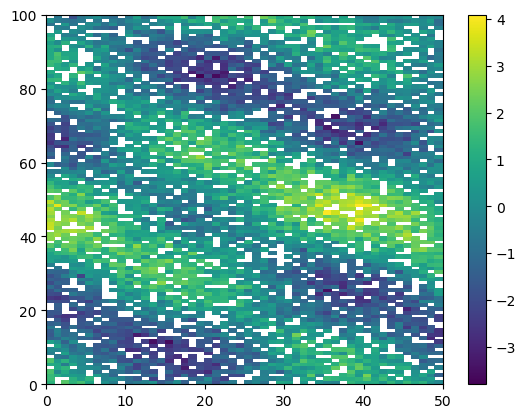

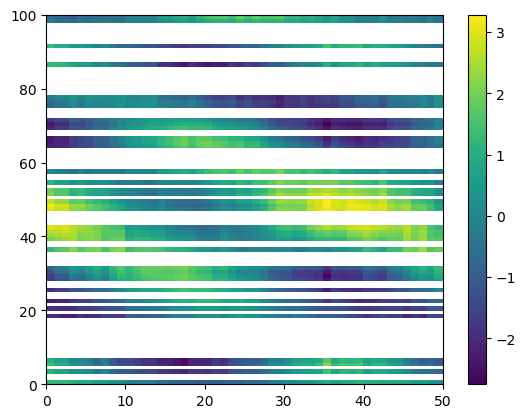

Cross validation value (mean squared misfit): 0.4385982424094944 for 3 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.20846664950440413
Estimation of mean error variance of reconstuctions: -0.23013159290509028 
Explained variance  91.65520292765459 percent
musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.104233, 20.846665]
 * Minimizer: 9.794708e-01
 * Minimum: 3.910774e-01
 * Iterations: 9
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): true
 * Objective Function Calls: 10
CV estimator from EOF 0.4385982424094944 is now 0.3663152854221125 if OI is used
Optimal musquare is 0.9794707663610931
Relative error on reconstruction 6.457957807851861e-5, relative error on CV estimator 0.027160517919285428
The two criteria to compare OI and EOF are: reconstruction 0.11947221944525943, closest CV 0.27160517919285426
Estimated musquare 0.2084666495

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000033FB7160>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000003416F4E0>)

In [5]:
xmean,XF,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X;minimumcoverage=(0.8,0.1))
figure()
pcolor(X),colorbar()
figure()
pcolor(XF.+xmean),colorbar()

Here forcing inversion of dimensions only forces internal transpose

Raw data variance and mean: 1.8683912447585305 and -0.009199525759375474
Number of missing points (including possible masks): 1131 out of 5000
Number of data points before elimination of low coverage regions is 3869 and cv fraction 0.01008012406306539
Number of data points after elimination of low coverage regions is 3869 and cv fraction 0.01008012406306539
svds!: variance and mean of the entry matrix: 1.8659789270047296 , 0.0019288636820460482 ; intial variance at points to fill in: 1.8577161155594237 
Convergence for 1 eofs, relative change 0.000811095567284289 after 7 iterations
Eof loop 1 with mean squared misfit: 0.814190721312321 
Convergence for 2 eofs, relative change 0.0009675807889164234 after 8 iterations
Eof loop 2 with mean squared misfit: 0.5625946403587048 
Convergence for 3 eofs, relative change 0.0006105027236759394 after 8 iterations
Eof loop 3 with mean squared misfit: 0.22867188508863542 
Eof loop 4 with mean squared misfit: 0.24498324930948706 
Eof loop 5 with mean

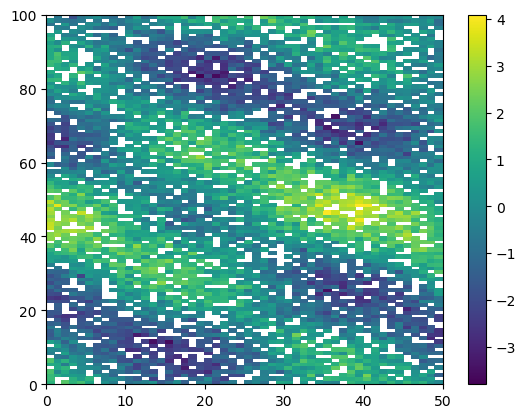

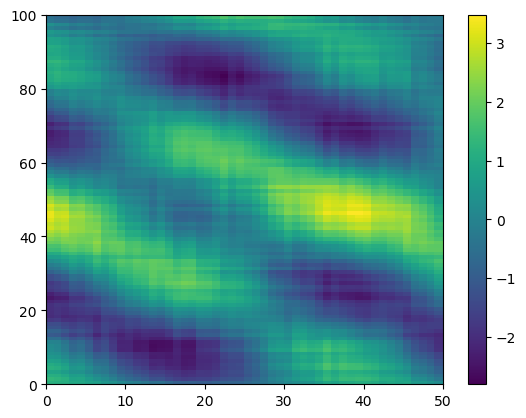


Eof loop 7 with mean squared misfit: 0.35177014185519667 
Cross validation value (mean squared misfit): 0.22867188508863542 for 3 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.22556612240833915
Estimation of mean error variance of reconstuctions: -0.0031057626802962757 
Explained variance  88.13915337769369 percent
musquare optimization: Both OI-EOF error and CV coherence
tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.112783, 22.556612]
 * Minimizer: 1.275158e-01
 * Minimum: 1.601378e+00
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.22867188508863542 is now 0.18235256610779876 if OI is used
Optimal musquare is 0.12751576876758744
Relative error on reconstruction 2.436750279242892e-7, relative error on CV estimator 0.04102974209031044
The two criteria to compare OI and EOF are: reconstruction 0.001218375139621

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000011B8198>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000014CF128>)

In [6]:
xmean,XF,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1))
figure()
pcolor(X),colorbar()
figure()
pcolor(XF.+xmean),colorbar()

Limit number of eofs to 2

Raw data variance and mean: 1.8683912447585305 and -0.009199525759375474
Number of missing points (including possible masks): 1131 out of 5000
Number of data points before elimination of low coverage regions is 3869 and cv fraction 0.01059705350219695
Number of data points after elimination of low coverage regions is 3869 and cv fraction 0.01059705350219695
svds!: variance and mean of the entry matrix: 1.8845947000773104 , 0.0041190896513214 ; intial variance at points to fill in: 1.9399521892361578 
Convergence for 1 eofs, relative change 0.0006562459077317172 after 7 iterations
Eof loop 1 with mean squared misfit: 1.1470817551473615 
Convergence for 2 eofs, relative change 0.000919940743714233 after 8 iterations
Eof loop 2 with mean squared misfit: 0.864783612526818 
Cross validation value (mean squared misfit): 0.864783612526818 for 2 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.47589984204971436
Estimation of mean error variance of reconstuctions: -0.388883770

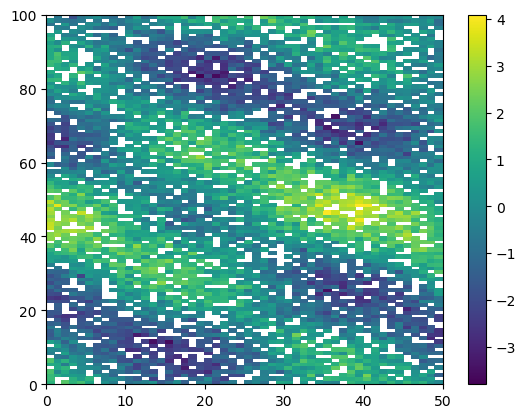

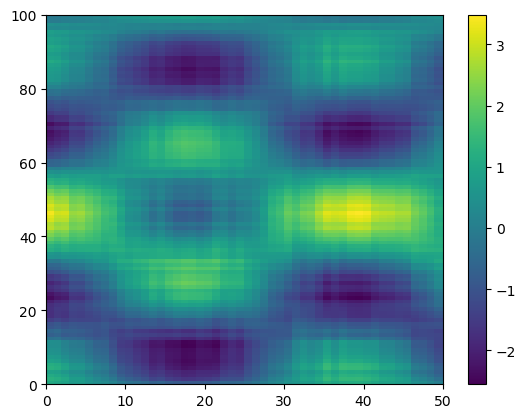

tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.237950, 47.589984]
 * Minimizer: 2.594053e-01
 * Minimum: 3.140494e-01
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.864783612526818 is now 0.7894321749063733 if OI is used
Optimal musquare is 0.2594053102434644
Relative error on reconstruction 5.537685277021163e-7, relative error on CV estimator 0.00759220948523411
The two criteria to compare OI and EOF are: reconstruction 0.0027688426385105813, closest CV 0.3112805888945985
Estimated musquare 0.47589984204971436 was inflated by factor 0.5450838334515898 into 0.2594053102434644
This optimal value provides OI interpolation CV estimator 0.7894321749063733
Mean error variance of reconstruction: 0.006725760631405373 
"Transposed" = "Transposed"
  0.167850 seconds (619.44 k allocations: 73.498 MiB, 11.12% gc time)


(PyObject <matplotlib.collections.PolyCollection object at 0x00000000445FB6A0>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000045009630>)

In [19]:
@time xmean,XF,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofmax=2)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF.+xmean),colorbar()


Check if restart improves time

Raw data variance and mean: 1.8683912447585305 and -0.009199525759375474
Number of missing points (including possible masks): 1131 out of 5000
Number of data points before elimination of low coverage regions is 3869 and cv fraction 0.01008012406306539
Number of data points after elimination of low coverage regions is 3869 and cv fraction 0.01008012406306539
svds!: variance and mean of the entry matrix: 1.4456766022656522 , -5.684341886080802e-18 ; intial variance at points to fill in: 3.231174267785236e-35 
Convergence for 1 eofs, relative change 0.0006827481177452868 after 7 iterations
Eof loop 1 with mean squared misfit: 0.6651195154513123 
Convergence for 2 eofs, relative change 0.0005824783668848712 after 9 iterations
Eof loop 2 with mean squared misfit: 0.49756075691998686 
Cross validation value (mean squared misfit): 0.49756075691998686 for 2 EOFs
Estimation for musquare based on DeRozier type of analysis: 0.4759151337951722
Estimation of mean error variance of reconstuctions: -

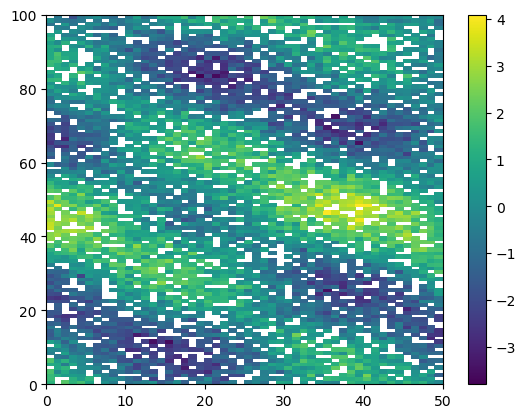

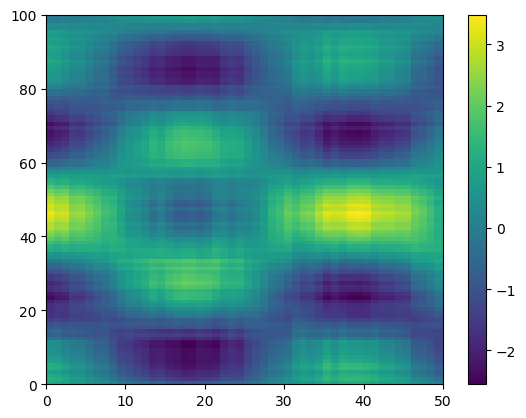


tutu = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [0.237958, 47.591513]
 * Minimizer: 2.594136e-01
 * Minimum: 2.348382e-01
 * Iterations: 15
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.0e-02*|x|+1.0e-07): false
 * Objective Function Calls: 16
CV estimator from EOF 0.49756075691998686 is now 0.45917725872251436 if OI is used
Optimal musquare is 0.2594136455266987
Relative error on reconstruction 5.491074449622057e-7, relative error on CV estimator 0.005951094768595691
The two criteria to compare OI and EOF are: reconstruction 0.0027455372248110285, closest CV 0.23209269597523197
Estimated musquare 0.4759151337951722 was inflated by factor 0.5450838334515898 into 0.2594136455266987
This optimal value provides OI interpolation CV estimator 0.45917725872251436
Mean error variance of reconstruction: 0.006725907963051597 
"Transposed" = "Transposed"
  0.208932 seconds (620.63 k allocations: 73.952 MiB, 6.59% gc time)


(PyObject <matplotlib.collections.PolyCollection object at 0x0000000045344438>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000466283C8>)

In [20]:
@time xmean,XF,UG,SG,VG,cva,cvb,errm,mus=DINEOFrun(X,[2,1];minimumcoverage=(0.1,0.1),eofmax=2,restart=XF.+xmean)
figure()
pcolor(X),colorbar()
figure()
pcolor(XF.+xmean),colorbar()
